# Importing Libaries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler


#Loading Tips Data Set

In [239]:
df=sns.load_dataset('tips')

In [240]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#Data Preprocessing & EDA

In [241]:
df.shape

(244, 7)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [243]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [244]:
df.duplicated().sum()

np.int64(1)

In [245]:
df.drop_duplicates(inplace=True)

In [246]:
df.shape

(243, 7)

In [247]:
df['total_bill'].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

In [248]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [249]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [250]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [251]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [252]:
value_count=df['sex'].value_counts()
value_count

,count
sex,
Male,157
Female,86


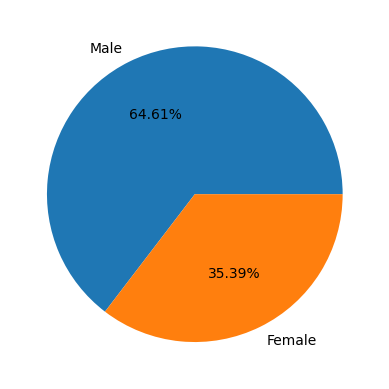

In [253]:
plt.pie(value_count,labels=["Male","Female"],autopct='%0.2f%%')
plt.show()

In [254]:
value_count=df['smoker'].value_counts()
value_count

,count
smoker,
No,151
Yes,92


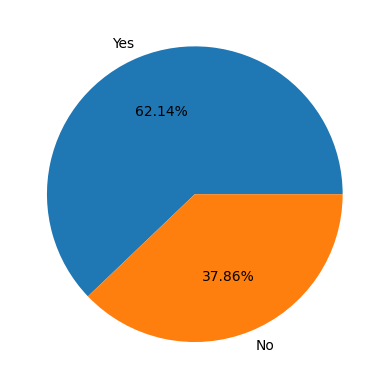

In [255]:
plt.pie(value_count,labels=["Yes","No"],autopct='%0.2f%%')
plt.show()

In [256]:
value_count=df['day'].value_counts()
value_count

,count
day,
Sat,87
Sun,76
Thur,61
Fri,19


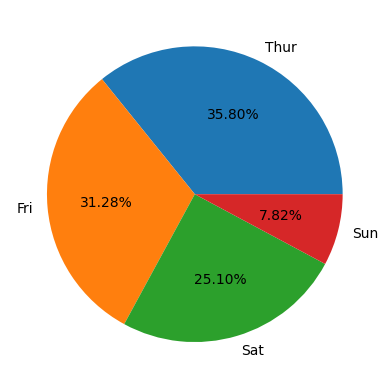

In [257]:
plt.pie(value_count,labels=["Thur","Fri","Sat","Sun"],autopct='%0.2f%%')
plt.show()

In [258]:
value_count=df['time'].value_counts()
value_count

,count
time,
Dinner,176
Lunch,67


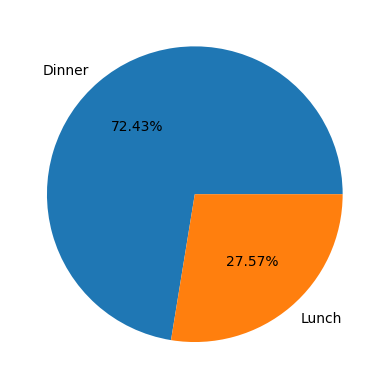

In [259]:
plt.pie(value_count,labels=["Dinner","Lunch"],autopct='%0.2f%%')
plt.show()

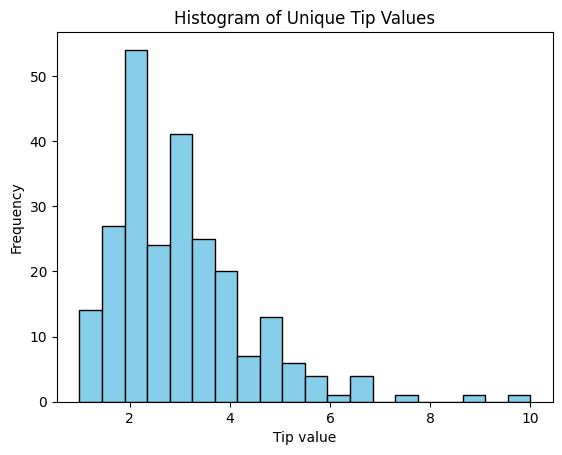

In [260]:
plt.hist(df['tip'],bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Tip Values')
plt.show()

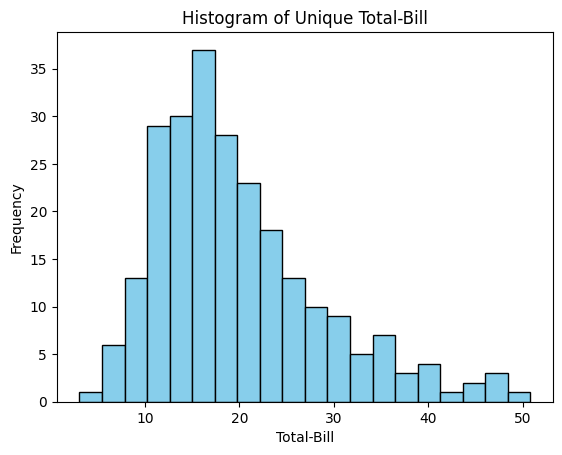

In [261]:
plt.hist(df['total_bill'],bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Total-Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Total-Bill')
plt.show()

#Data Encoding

In [262]:
categorical_cols=['sex','smoker','day','time']

# Initialize OneHotEncoder with sparse_output=False
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False)


# Fit and transform the categorical columns
encoded_feature=ohe.fit_transform(df[categorical_cols])



In [263]:
encoded_feature

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [264]:
ohe.get_feature_names_out()

array(['sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch'],
      dtype=object)

In [265]:
# Create a DataFrame from the encoded features with their column names
encoded_df=pd.DataFrame(encoded_feature,columns=ohe.get_feature_names_out(categorical_cols),index=df.index)
encoded_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [266]:
# Drop the original categorical columns from the main DataFrame
df_processed=df.drop(categorical_cols,axis=1)
df_processed

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [267]:
# Concatenate the processed DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df_processed, encoded_df], axis=1)
df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#Data Seperation

In [268]:
x=df.drop('total_bill',axis=1)


In [269]:
y=df.total_bill

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [271]:
x

,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [272]:
y

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [273]:
x.shape

(243, 12)

In [274]:
y.shape

(243,)

#Data Modeling With Neural Network Architecture

In [327]:
model=tf.keras.Sequential([

    #input layer
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1:])),

    #hidden layers
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),

    #output layer
    tf.keras.layers.Dense(1)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [303]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [328]:
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.callbacks import EarlyStopping

In [329]:
model.compile(optimizer='adam',loss='mse',metrics=[R2Score()])

In [330]:
# early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [331]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stop])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 478.8977 - r2_score: -5.8963 - val_loss: 440.7621 - val_r2_score: -5.9200
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 465.1517 - r2_score: -4.9636 - val_loss: 429.2307 - val_r2_score: -5.7390
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 430.6905 - r2_score: -4.9228 - val_loss: 414.0150 - val_r2_score: -5.5001
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 451.8049 - r2_score: -4.2585 - val_loss: 394.0750 - val_r2_score: -5.1871
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 388.0480 - r2_score: -4.1044 - val_loss: 369.2221 - val_r2_score: -4.7969
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 398.4046 - r2_score: -3.9790 - val_loss: 338.3223 - val_r2_score: -4.3117
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 342.8202 - r2_score: -3.2777 - val_loss: 300.8033 - val_r2_score: -3.7227
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 312.8399 - r2_scor

#Graph Representation Of Training Loss & Validation Loss

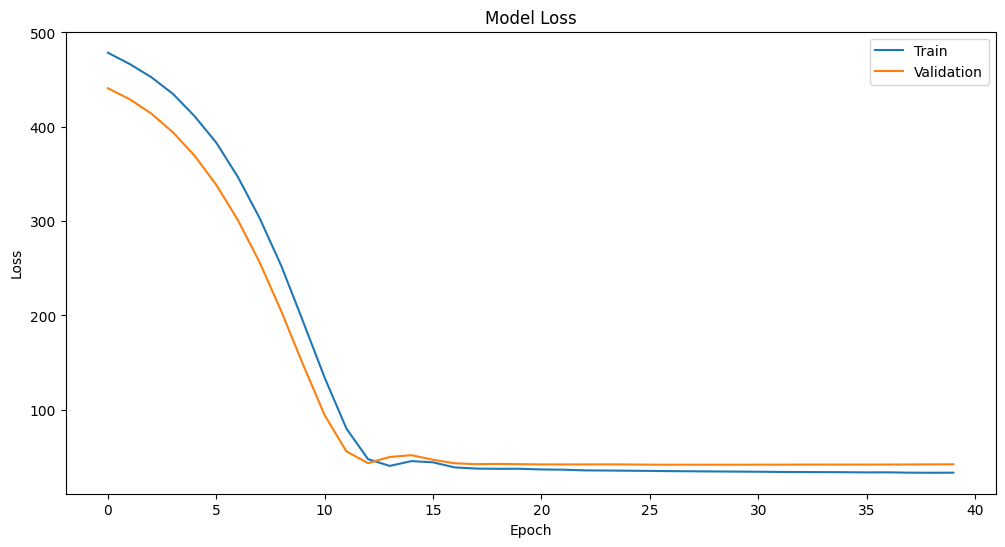

In [332]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

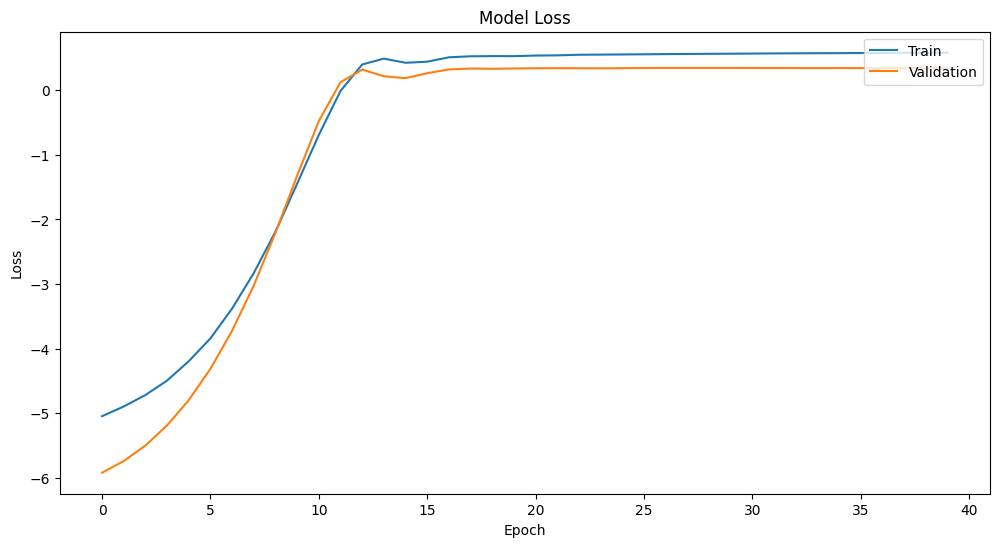

In [333]:
plt.figure(figsize=(12,6))
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

#Calculation of Test Loss & Accuracy

In [336]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 37.4610 - r2_score: 0.5760
Test loss: 37.6230354309082
Test accuracy: 0.5816989541053772
